In [0]:
from google.colab import drive
drive.mount('/gdrive')



In [0]:
import csv
import numpy as np
import matplotlib.pyplot as plt



In [0]:
path="/gdrive/My Drive/Online Retail.csv"
online_retail = []
with open(path, 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        online_retail.append(row)       
csvfile.close()



In [0]:
unit_price = [row[5] for row in online_retail[1:]]
unit_price = np.array(unit_price, float)


In [17]:
#Q1
up_mean = unit_price.mean()
up_std = unit_price.std()
up_min = unit_price.mean()
up_max = unit_price.max()

print(f"Mean unit price:{up_mean:.2f}")
print(f"std deviation in unit price:{up_std:.2f}")
print(f"Min unit price:{up_min:.2f}")
print(f"Max unit price:{up_max:.2f}")



Mean unit price:4.61
std deviation in unit price:96.76
Min unit price:4.61
Max unit price:38970.00


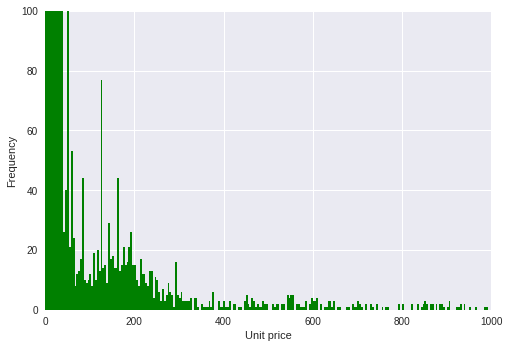

In [18]:
#Q2
unit_price = np.array(unit_price, int)
bins = 12000
plt.hist(unit_price,bins=bins,color = 'green', 
        histtype = 'bar')
plt.axis([0,1000, 0, 100])
plt.xlabel("Unit price")
plt.ylabel("Frequency")
plt.show()




In [0]:


#Q3 Mean unit price goruped by country
unitprice_country = {}
for row in online_retail[1:]:
    if row[-1] in unitprice_country:
        unitprice_country[row[-1]][0]+=float(row[5])
        unitprice_country[row[-1]][1]+=1

    else:
        unitprice_country[row[-1]] = [float(row[5]),1]
    

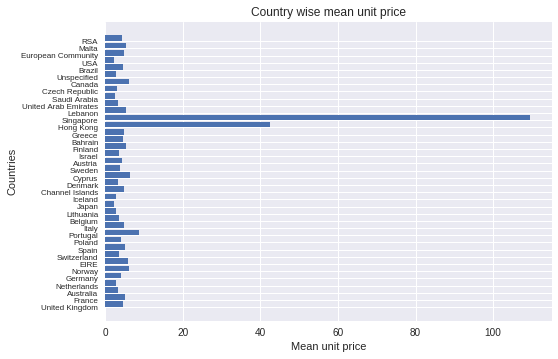

In [20]:
countrywise_mean = []
country_labels = []
for k,v in unitprice_country.items():
    country_labels.append(k)
    countrywise_mean.append(v[0]/v[1])
    
y_axis = [i for i in range(len(country_labels))]
plt.barh(y_axis, countrywise_mean,align='edge')
plt.yticks(y_axis,country_labels,fontsize=8)
plt.xlabel("Mean unit price")
plt.ylabel("Countries")
plt.title("Country wise mean unit price")
plt.show()



In [0]:


#Q4 Find min and max of unit price group by customerID
cust_dict = {}
for row in online_retail[1:]:
    price = float(row[-3])
    if row[-2] in cust_dict:      
        if price > cust_dict[row[-2]][0]:
            cust_dict[row[-2]][0] = price
        if price < cust_dict[row[-2]][1]:
            cust_dict[row[-2]][1] = price
    else:
        cust_dict[row[-2]] = [price,price]


In [22]:
print("Cust_id:Max, Min")
print(*[f"{k}:{v}" for k,v in cust_dict.items()][:20],sep='\n')



Cust_id:Max, Min
17850:[35.75, 1.06]
13047:[14.95, 0.42]
12583:[18.0, 0.06]
13748:[14.95, 0.39]
15100:[10.95, 10.95]
15291:[45.0, 0.29]
14688:[25.0, 0.19]
17809:[717.23, 0.21]
15311:[14.95, 0.12]
14527:[80.0, 0.19]
16098:[21.95, 0.29]
18074:[12.75, 0.65]
17420:[19.95, 1.25]
16029:[8142.75, 0.2]
16250:[7.95, 0.42]
12431:[16.95, 0.0]
17511:[16.95, 0.1]
17548:[5.95, 0.29]
13705:[165.0, 0.65]
13747:[9.95, 9.95]


In [0]:
#Q5 monthly  and yearly cumulative sales
"""
  yearly_sales = {year:[monthly_sales(dict), total_sale_in_year(float)]}
  monthly_sales = {month:total_sale_in_month}
"""
yearly_sales = {}
qty_ind = 3
price_ind = -3
date_ind = -4

for row in online_retail[1:]:
    date,_ = row[date_ind].split()
    month,_,year = date.split('/')
    
    qty = int(row[qty_ind])
    unit_price = float(row[price_ind])
    
    if year in yearly_sales:
        monthly_sales = yearly_sales[year][0]
        if month in monthly_sales:
           monthly_sales[month] += qty*unit_price
        else:
           monthly_sales[month] = qty*unit_price
        yearly_sales[year][1] += qty*unit_price
    else:
        yearly_sales[year] = [{month:qty*unit_price}, qty*unit_price]
        
        
    


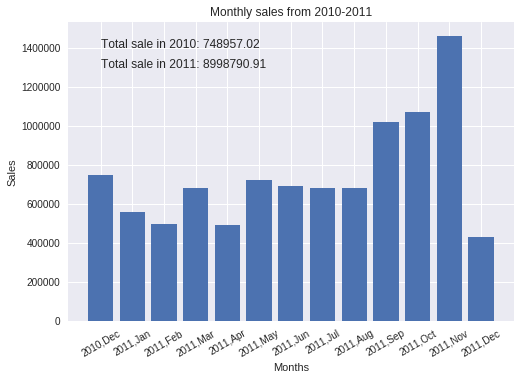

In [24]:
month_name = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",
              5:"May", 6:"Jun", 7:"Jul", 8:"Aug",
              9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
x_labels = []
y_axis = []

for year in yearly_sales.keys():
    for month in yearly_sales[year][0].keys():
        x_labels.append(f"{year},{month_name[int(month)]}")
        y_axis.append(yearly_sales[year][0][month])
x_axis = [i for i in range(len(x_labels))]

plt.bar(x_axis, y_axis)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.xticks(x_axis, x_labels, rotation=30)
plt.title("Monthly sales from 2010-2011")
plt.text(0,1400000,f"Total sale in 2010: {yearly_sales['2010'][1]:.2f}")
plt.text(0,1300000,f"Total sale in 2011: {yearly_sales['2011'][1]:.2f}")

plt.show()